Example by Victoria Garza for making sequential movie frames of HYCOM data

In [1]:
#! /usr/bin/env python
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
import matplotlib.pyplot as plt
import numpy as np     #work with numbers
import xarray as xr     #work with arrays and open files
import datetime        #work with date
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import colorbar, colors

In [2]:
#open files     under properties change it to forward slash
#path = '/work/06591/jws22/stampede2/HYCOM/Data/hycom_gomu_501_1996*.nc'
path = 'C:/Users/victo/Desktop/Hycom files/hycom_gomu_501_1996*.nc'
#path = 'D:/hycom1996Jan/hycom_gomu_501_1996*.nc'
file= xr.open_mfdataset(path, decode_times=False)

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """
C:\Users\victo\Anaconda3\lib\site-packages\xarray\backends\api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [3]:
file.water_u

<xarray.DataArray 'water_u' (time: 8, depth: 40, lat: 346, lon: 541)>
dask.array<concatenate, shape=(8, 40, 346, 541), dtype=float32, chunksize=(1, 40, 346, 541), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * time     (time) float64 -2.786e+04 -2.784e+04 ... -2.772e+04 -2.77e+04
Attributes:
    long_name:      Eastward Water Velocity
    standard_name:  eastward_sea_water_velocity
    units:          m/s
    NAVO_code:      17

In [4]:
#Sets font formats
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
#mpl.rcParams['lines.linewidth'] = 6.0

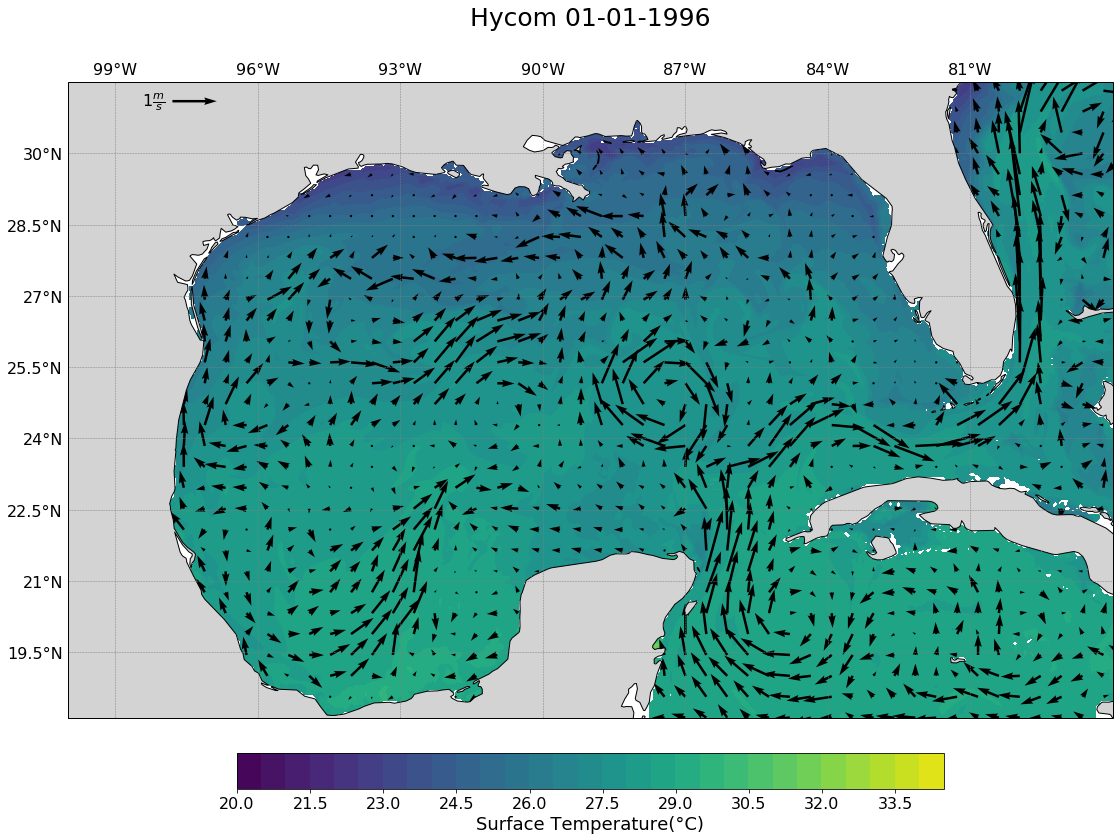

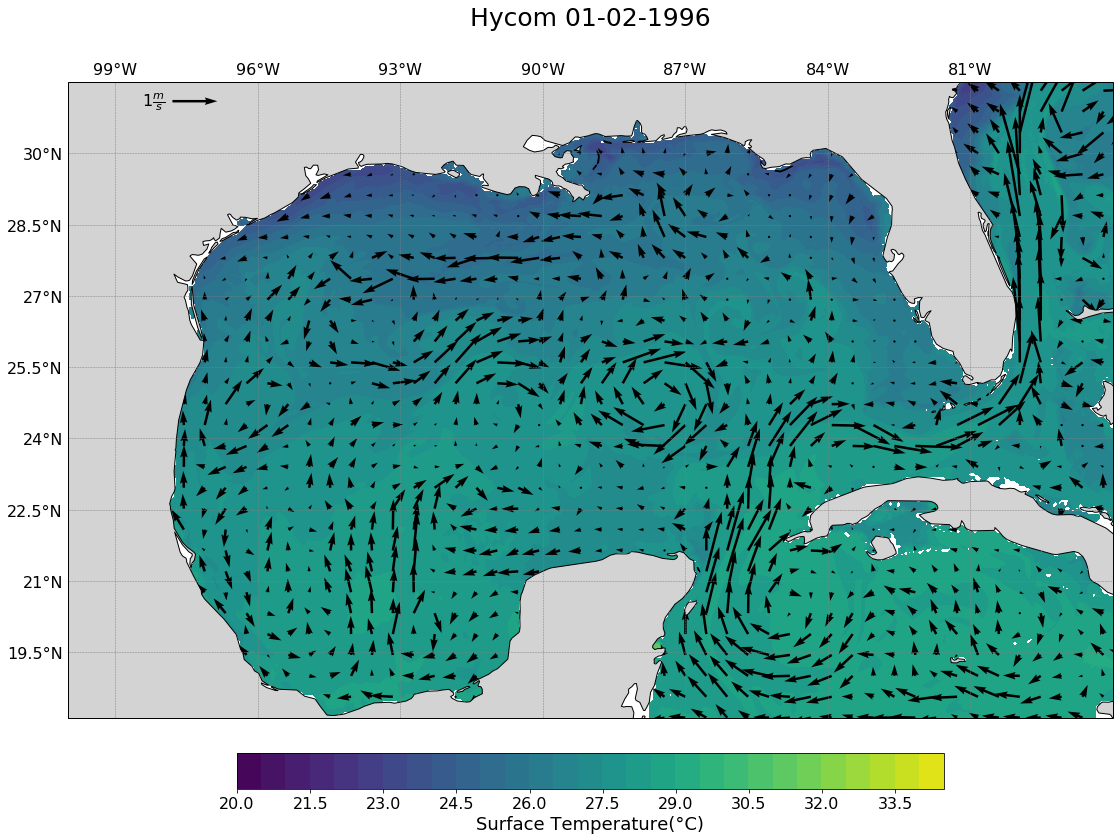

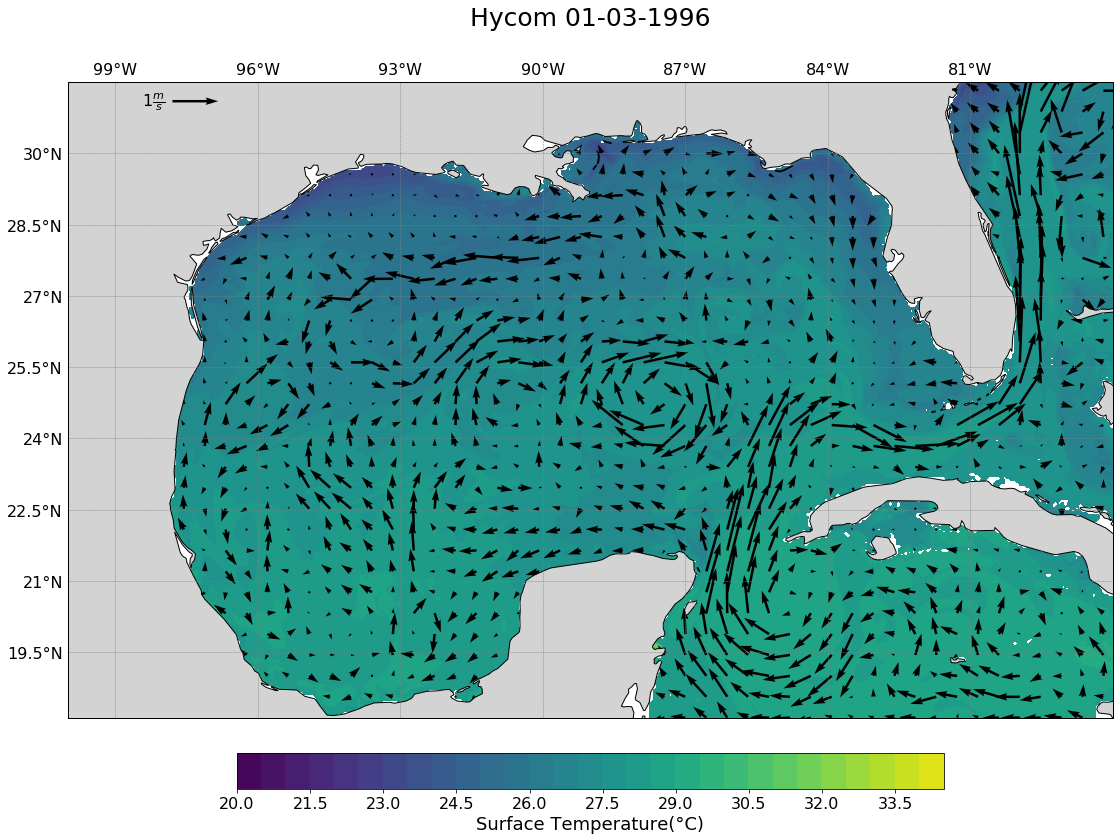

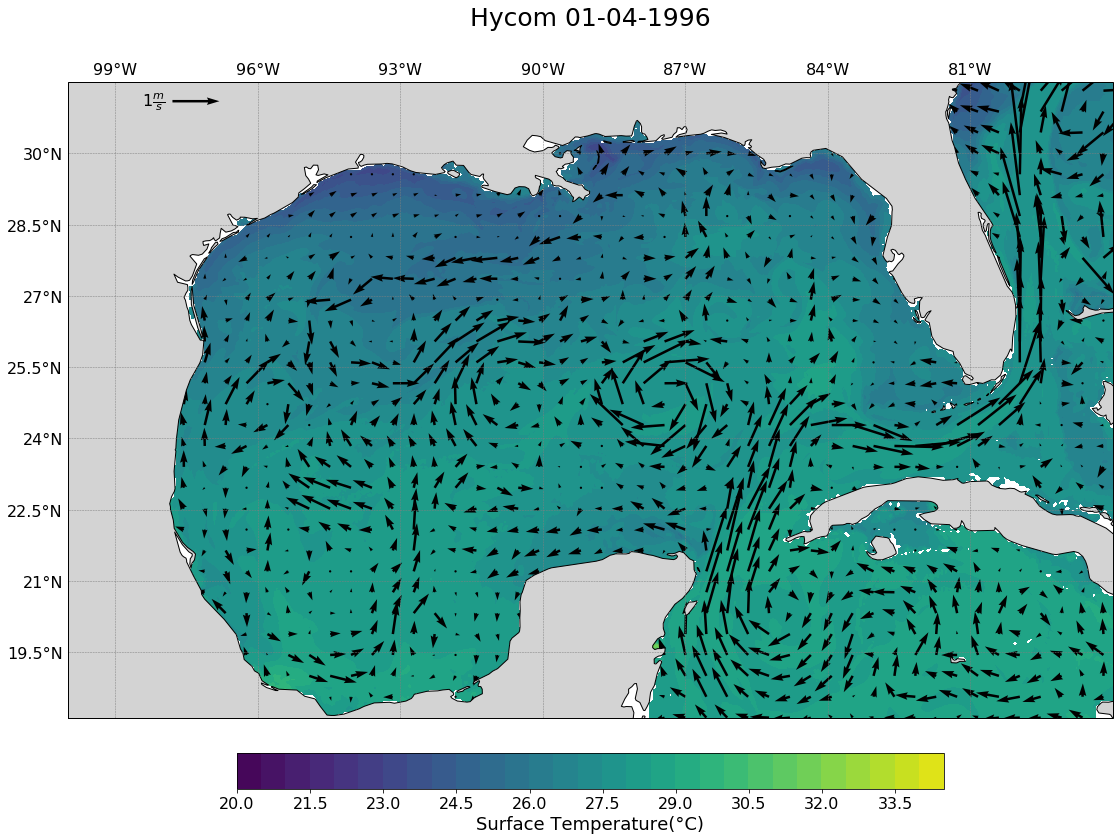

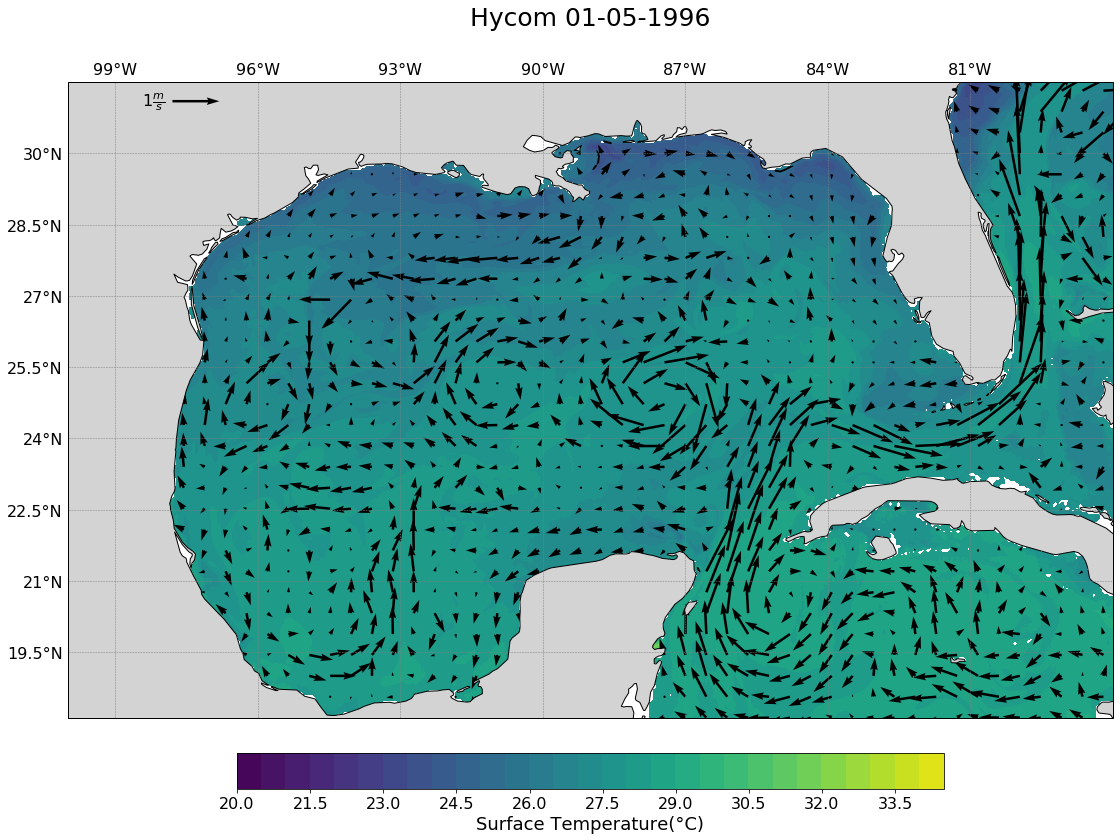

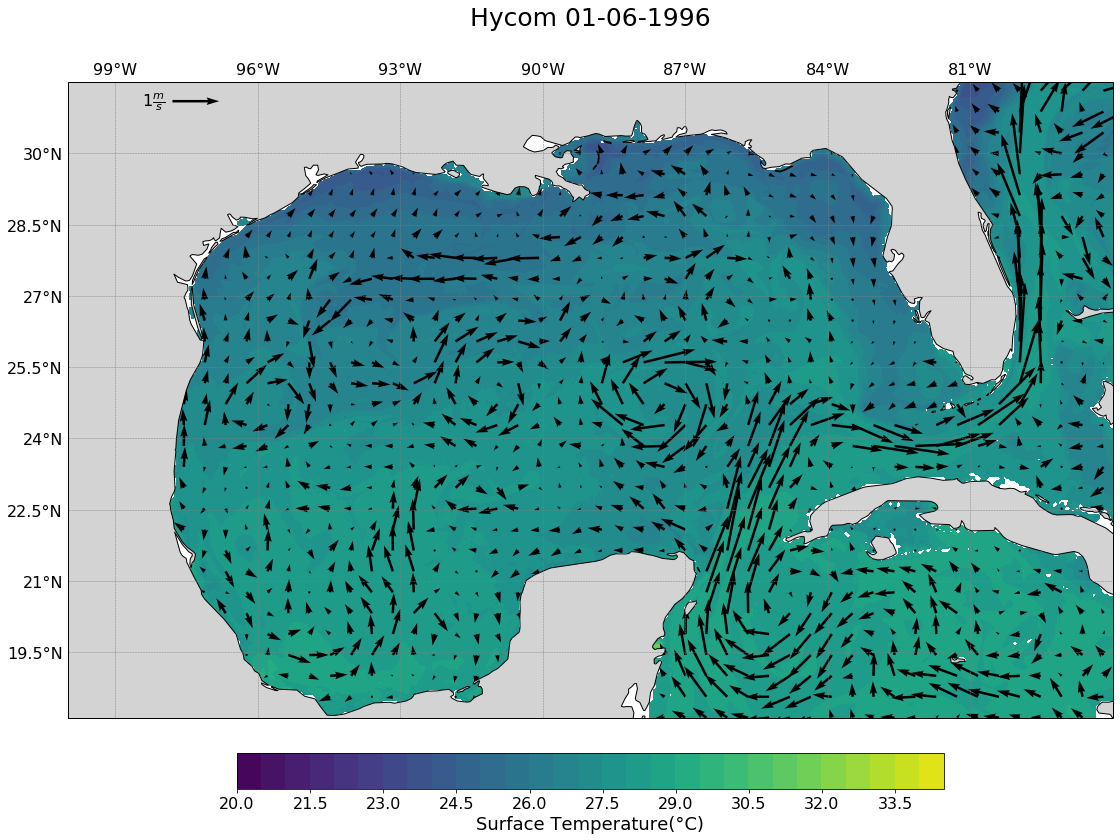

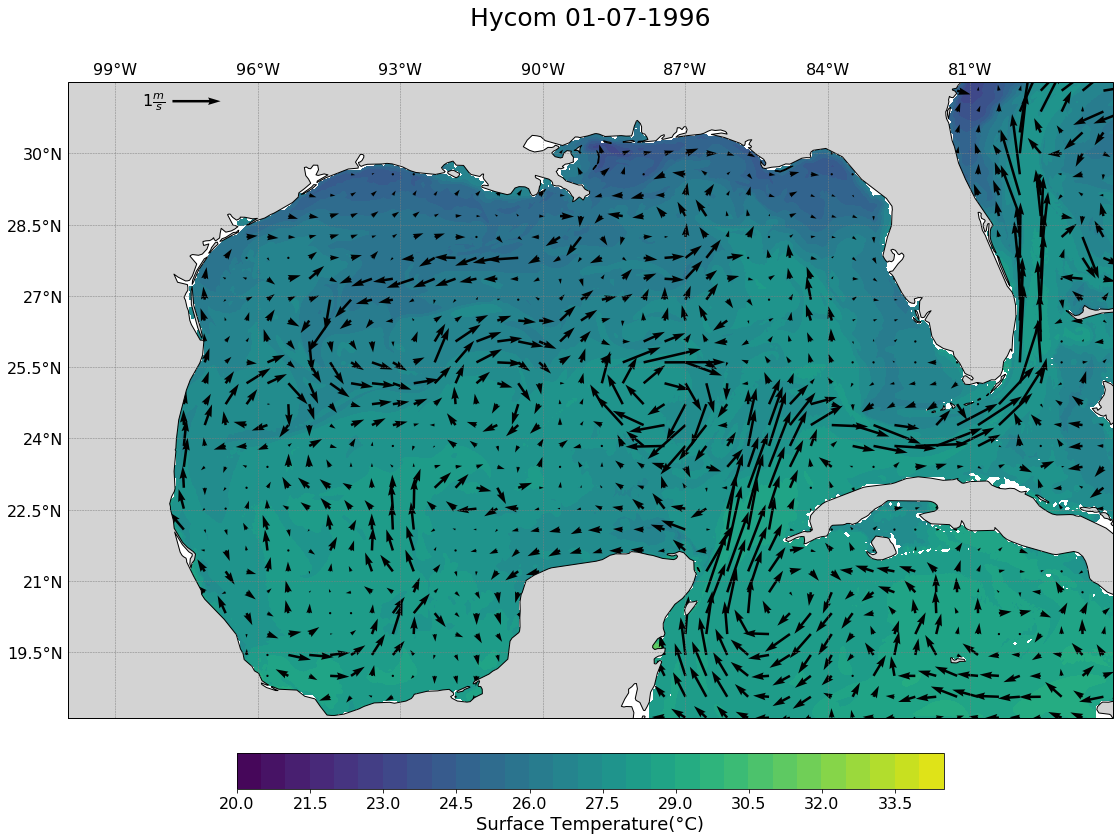

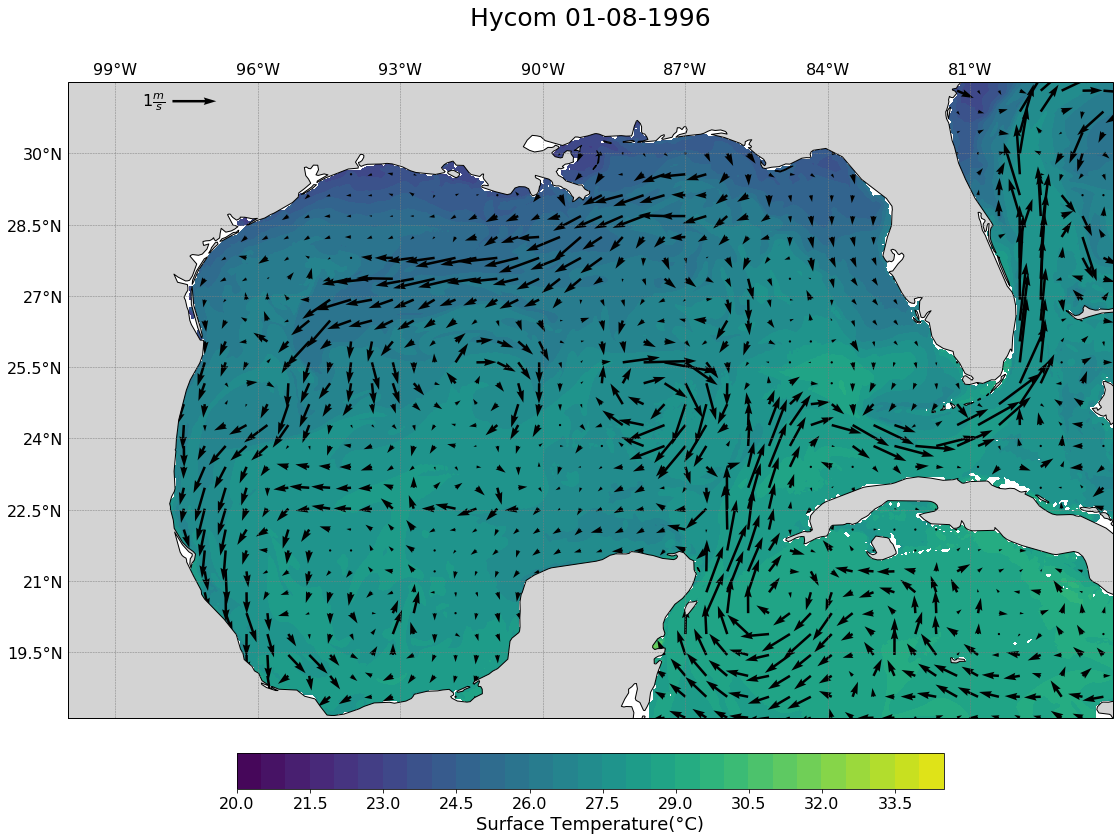

In [5]:
#sets important variables
b =11
i=0                             #what file to start from  
date = datetime(1996,1,1)     #Sets the date of the first file year,month.day
step = np.arange(20,35,0.5)     #sets the levels to be used in the projection

for time_index in range(0, file.time.shape[0],1):
    
    #Creates the type of projection and the area of the projection
    fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()))  
    ax.set_extent([260,282, 18.11, 31.5])
    
    #changes the background of the map, should be ocean instead of land but it wouldnt work
    var = file.water_temp[i,0,:,:] 

    
    #set variables from the data that will be plotted onto the map
    x, y =file.lon, file.lat
    U = file.water_u[i,0,:,:]
    V = file.water_v[i,0,:,:]
    
    
    
    #Contours the data on tho the map projection
    p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(),vmin = 20,vmax = 35,levels = step)#,N=7)
    
    #Creates colorbar based on the contour 
    cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
    cbar.set_label("Surface Temperature" +'(\N{DEGREE SIGN}C)', size = 18)
    
    
    
    #Creates the quiver arrows and places the quiver key at the top left
    Q = plt.quiver(x[::b], y[::b], U[::b, ::b], V[::b, ::b],units= 'xy',linewidth=.05)
    qk = plt.quiverkey(Q, 0.1,0.97, 1, r'$1 \frac{m}{s}$', labelpos="W")

    
    
    #Sets the land onto the projection with the right color and scale
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='lightgrey')
    ax.add_feature(land_50m)
 


    #Sets the graph title and format the size and location of the title
    ax.set_title('Hycom '+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)
    
    
    
    ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
        #and sets the grid lines on the graph
    ##Set the grid lines to another variable so it edits the grid variables and not the whole map
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=.5, color='gray', linestyle='--')
    gl.xlabels_top = True    
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size' : 16}
    gl.ylabel_style = {'size' : 16}
    
    
    saveState = 'C:/Users/victo/Desktop/Hycom files/'
   # print ('saving plot...' + pltnm)
   # fig.savefig(saveState +str(date.strftime("%m-%d-%Y")), bbox_inches='tight', quality = 95, dpi = 500)
    #Increment the date, and what "time" it is looking at in the file
    date = date + timedelta(days=1)
    i +=1